### Random Forest Models
---
Random forest is essentially a CART algorithm but creates an ensemble of many trees instead of one.

### Advantages:-
1. Improved performance
2. Improved robustness

Random Forest uses majority agreement prediction. which basically means that the algorithm takes in the majority prediction and uses it.

### Process of building multiple trees
1. Bootstrap aggregation
2. Feature randomness

#### Bootstrap aggregation
decision trees are so called high-variance estimatiors. which means that small changes to sample data can greatly affect the tree structure.
*ideally we want to turn it into **low-variance** estimator by creating many trees and usind them in aggregation to make the prediction*

Bootstraping is a technique where where instead of taking the whole training data to build one tree, we use sampling with replacement to create many samples of the same size.

#### Feature randomness
The second part in reducing the correlation between the trees comes from using a random sett or selection of features.

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import plotly.express as px
import plotly.graph_objects as go
import graphviz

In [18]:
df = pd.read_csv('../data/weatherAUS.csv', encoding='utf-8')

df = df[pd.isnull(df['RainTomorrow'])==False]
df = df.fillna(df.mean())

df['RainTodayFlag'] = df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag'] = df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [23]:
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(criterion='gini', 
                               bootstrap=True, 
                               random_state=0, 
                               max_features='sqrt',
                               min_samples_leaf=1000, 
                               max_depth=4, 
                               n_estimators=1000
                              )
clf = model.fit(X_train, y_train)

pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

print('*************** Model Summary ***************')
print('Classes: ', clf.classes_)
print('No. of outputs: ', clf.n_outputs_)
print('No. of features: ', clf.n_features_)
print('No. of Estimators: ', len(clf.estimators_))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Model Summary ***************
Classes:  [0 1]
No. of outputs:  1
No. of features:  17
No. of Estimators:  1000
--------------------------------------------------------

*************** Evaluation on Test Data ***************


/home/kansih/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning:

Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.



Accuracy Score:  0.8345933401315095
              precision    recall  f1-score   support

           0       0.84      0.98      0.90     22067
           1       0.80      0.35      0.48      6372

    accuracy                           0.83     28439
   macro avg       0.82      0.66      0.69     28439
weighted avg       0.83      0.83      0.81     28439

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8326036886614976
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     88249
           1       0.79      0.34      0.48     25505

    accuracy                           0.83    113754
   macro avg       0.81      0.66      0.69    113754
weighted avg       0.83      0.83      0.81    113754

--------------------------------------------------------


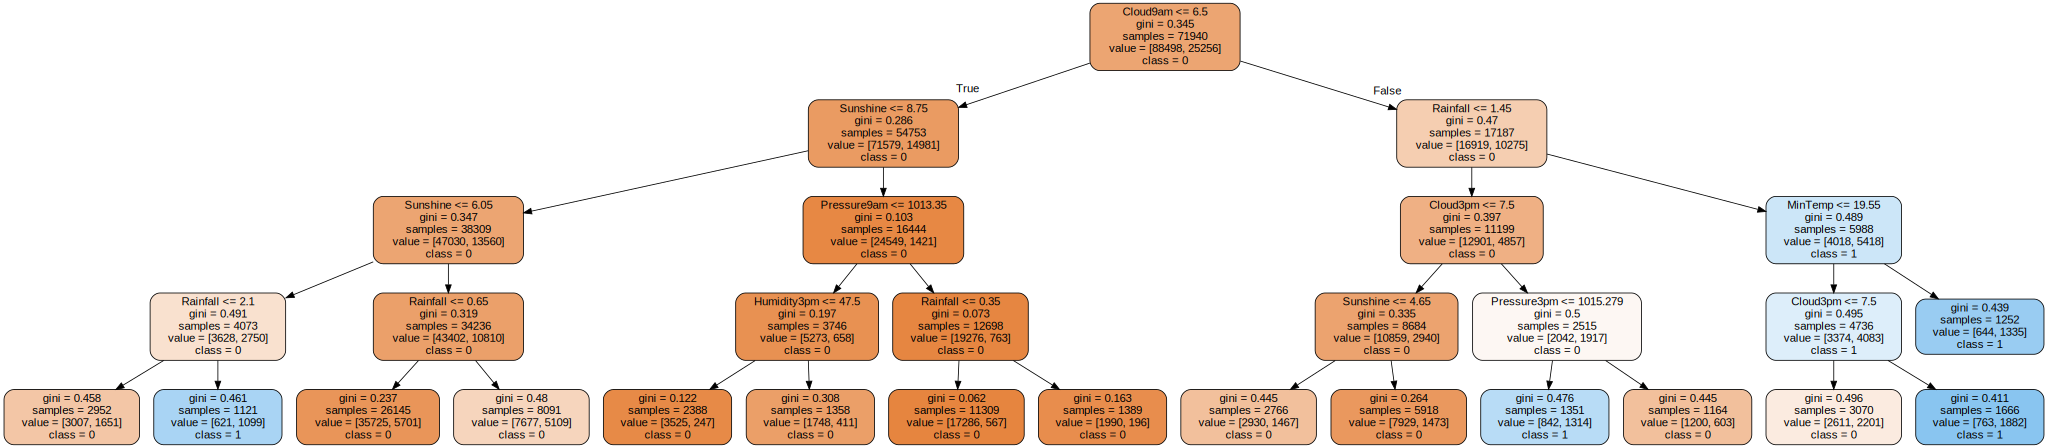

In [24]:
dot_data = tree.export_graphviz(clf.estimators_[552], out_file=None, 
                            feature_names=X.columns, 
                            class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                            filled=True, 
                            rounded=True, 
                            rotate=False,
                           ) 
graph = graphviz.Source(dot_data)
graph